In [1]:
# Jupyter notebook setup

import sys
# Add our code
sys.path.append("../")

# Make sure imports are updated constantly
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from src.preprocess.pipeline import Pipeline
from src.data.dataset import APTOSSubmissionDataset

In [34]:
TRAIN_DATA_FRAME = "../data/aptos2019-blindness-detection/train.csv"
TRAIN_DATA_DIRECTORY = "../data/aptos2019-blindness-detection/train_images"

TEST_DATA_FRAME = "../data/aptos2019-blindness-detection/test.csv"
TEST_DATA_DIRECTORY = "../data/aptos2019-blindness-detection/test_images"

# Bare minimum normalization stages
PIPELINE_STAGES = [
    ("resize", {"width": 256, "height": 256})
]
# Proper attempt to normalize images
ADVANCED_PIPELINE_STAGES = [
    (
        "crop_dark_borders",
        {
            "tol": 10,
        },
    ),
    (
        "resize_and_pad",
        {
            "width": 256,
            "height": 256,
            # Matching bias in bens
            "border_colour": 0
        },
    ),
    (
        "bens",
        {
            "image_weight": 4,
            "blur_window": (0, 0),
            "blur_sigma_x": 20,
            "blur_weight": -4,
            "bias": 128,
        },
    ),
    (
        "fill_dark_borders",
        {},
    ),
    (
        "eight_bit_normalization",
        {}
    )
]

In [4]:
pipeline = Pipeline(PIPELINE_STAGES, debug=False)

train_df = pd.read_csv(TRAIN_DATA_FRAME)
train_dataset = APTOSSubmissionDataset(train_df, TRAIN_DATA_DIRECTORY, pipeline)

test_df = pd.read_csv(TEST_DATA_FRAME)
test_dataset = APTOSSubmissionDataset(test_df, TEST_DATA_DIRECTORY, pipeline)

In [7]:
test_images = []
train_images = []

for test_batch, train_batch in ((test_dataset[i], train_dataset[i]) for i in range(0, len(test_dataset), 10)):
    
    test_images.append(test_batch[0])
    train_images.append(train_batch[0])

In [10]:
test_arrays = np.array(test_images)
train_arrays = np.array(train_images)

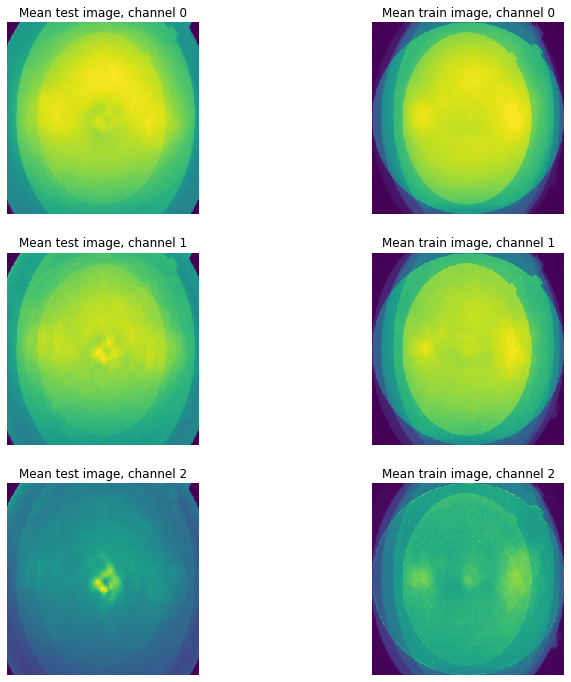

In [26]:
fig, axes = plt.subplots(3, 2)
fig.set_figheight(12)
fig.set_figwidth(12)
for i in range(3):
    axes[i][0].imshow(test_arrays[:, i, :, :].mean(axis=0))
    axes[i][0].set_title(f"Mean test image, channel {i}")
    axes[i][0].axis("off")

    axes[i][1].imshow(train_arrays[:, i, :, :].mean(axis=0))
    axes[i][1].set_title(f"Mean train image, channel {i}")
    axes[i][1].axis("off")

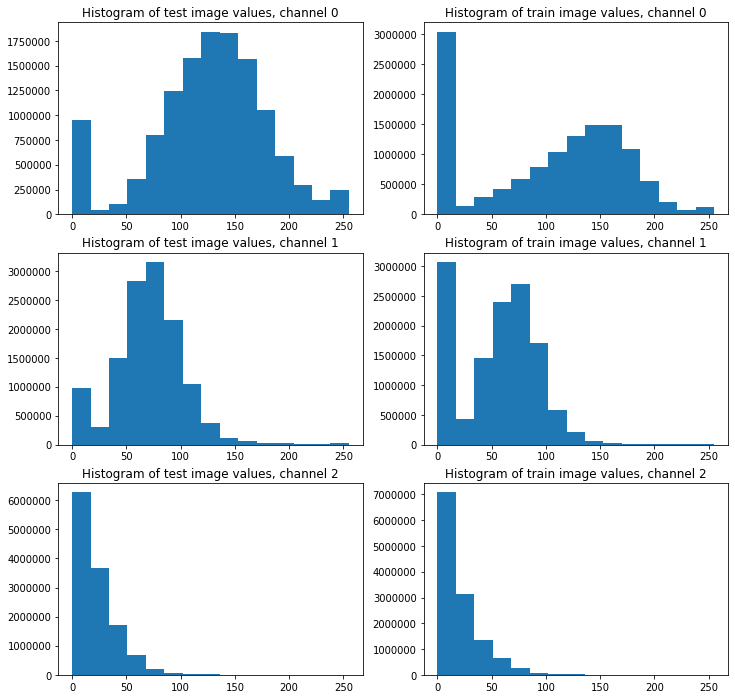

In [30]:
fig, axes = plt.subplots(3, 2)
fig.set_figheight(12)
fig.set_figwidth(12)
for i in range(3):
    axes[i][0].hist(test_arrays[:, i, :, :].flatten(), bins=15)
    axes[i][0].set_title(f"Histogram of test image values, channel {i}")

    axes[i][1].hist(train_arrays[:, i, :, :].flatten(), bins=15)
    axes[i][1].set_title(f"Histogram of train image values, channel {i}")

In [35]:
pipeline = Pipeline(ADVANCED_PIPELINE_STAGES, debug=False)

train_df = pd.read_csv(TRAIN_DATA_FRAME)
train_dataset = APTOSSubmissionDataset(train_df, TRAIN_DATA_DIRECTORY, pipeline)

test_df = pd.read_csv(TEST_DATA_FRAME)
test_dataset = APTOSSubmissionDataset(test_df, TEST_DATA_DIRECTORY, pipeline)

In [36]:
test_images = []
train_images = []

for test_batch, train_batch in ((test_dataset[i], train_dataset[i]) for i in range(0, len(test_dataset), 10)):
    
    test_images.append(test_batch[0])
    train_images.append(train_batch[0])

In [37]:
test_arrays = np.array(test_images)
train_arrays = np.array(train_images)

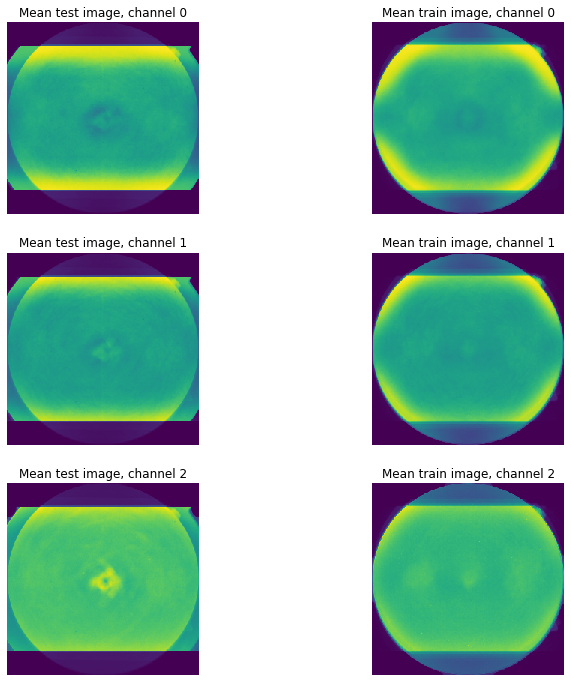

In [38]:
fig, axes = plt.subplots(3, 2)
fig.set_figheight(12)
fig.set_figwidth(12)
for i in range(3):
    axes[i][0].imshow(test_arrays[:, i, :, :].mean(axis=0))
    axes[i][0].set_title(f"Mean test image, channel {i}")
    axes[i][0].axis("off")

    axes[i][1].imshow(train_arrays[:, i, :, :].mean(axis=0))
    axes[i][1].set_title(f"Mean train image, channel {i}")
    axes[i][1].axis("off")

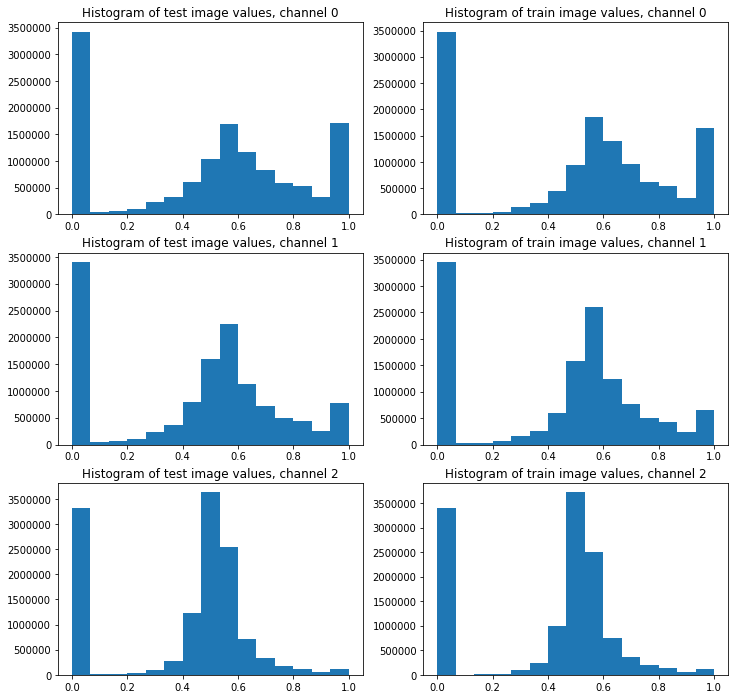

In [39]:
fig, axes = plt.subplots(3, 2)
fig.set_figheight(12)
fig.set_figwidth(12)
for i in range(3):
    axes[i][0].hist(test_arrays[:, i, :, :].flatten(), bins=15)
    axes[i][0].set_title(f"Histogram of test image values, channel {i}")

    axes[i][1].hist(train_arrays[:, i, :, :].flatten(), bins=15)
    axes[i][1].set_title(f"Histogram of train image values, channel {i}")
